To usando só opencv,não busquei testar monAI ainda.
Primeiro bloco de código define as funções, segundo bloco testa e terceiro aplica em todo o dataset.
Do jeito que tá ele plota automaticamente, tem q comentar um trecho no fim da preprocess_mri, tem um comentário em cima p identificar facil.

In [29]:
import kagglehub
import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt

# P/ baixar do kaggle
base_path = kagglehub.dataset_download("navoneel/brain-mri-images-for-brain-tumor-detection")
image_paths = glob.glob(base_path + "/**/*.jpg", recursive=True)

def sample_plot(images):

  titles = [
        "Original (BGR)",
        "Cinza",
        "Filtro Bilateral",
        "CLAHE (Contraste)",
        "Máscara Cerebral",
        "Final (Normalizada)"
    ]

  plt.figure(figsize=(15,10))
  for i in range(len(images)):
        plt.subplot(2, 3, i+1)
        cmap = "gray" if len(images[i].shape) == 2 else None
        plt.imshow(images[i], cmap=cmap)
        plt.title(titles[i])
        plt.axis("off")
  plt.tight_layout()
  plt.show()


def preprocess_mri(path):
    img = cv2.imread(path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blur = cv2.bilateralFilter(gray, 9, 75, 75)

    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    enhanced = clahe.apply(blur)

    _, mask = cv2.threshold(enhanced, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    c = max(contours, key=cv2.contourArea)
    mask_brain = np.zeros_like(mask)
    cv2.drawContours(mask_brain, [c], -1, 255, -1)
    brain_only = cv2.bitwise_and(enhanced, enhanced, mask=mask_brain)

    resized = cv2.resize(brain_only, (128, 128))
    normalized = resized / 255.0

    #Comentar aqui para nao plotar
    images = [
        cv2.cvtColor(img, cv2.COLOR_BGR2RGB),
        gray,
        blur,
        enhanced,
        mask_brain,
        normalized
    ]

    #Aqui tb
    sample_plot(images)

    return normalized



Using Colab cache for faster access to the 'brain-mri-images-for-brain-tumor-detection' dataset.


Visualizar filtros pra um caso positivo

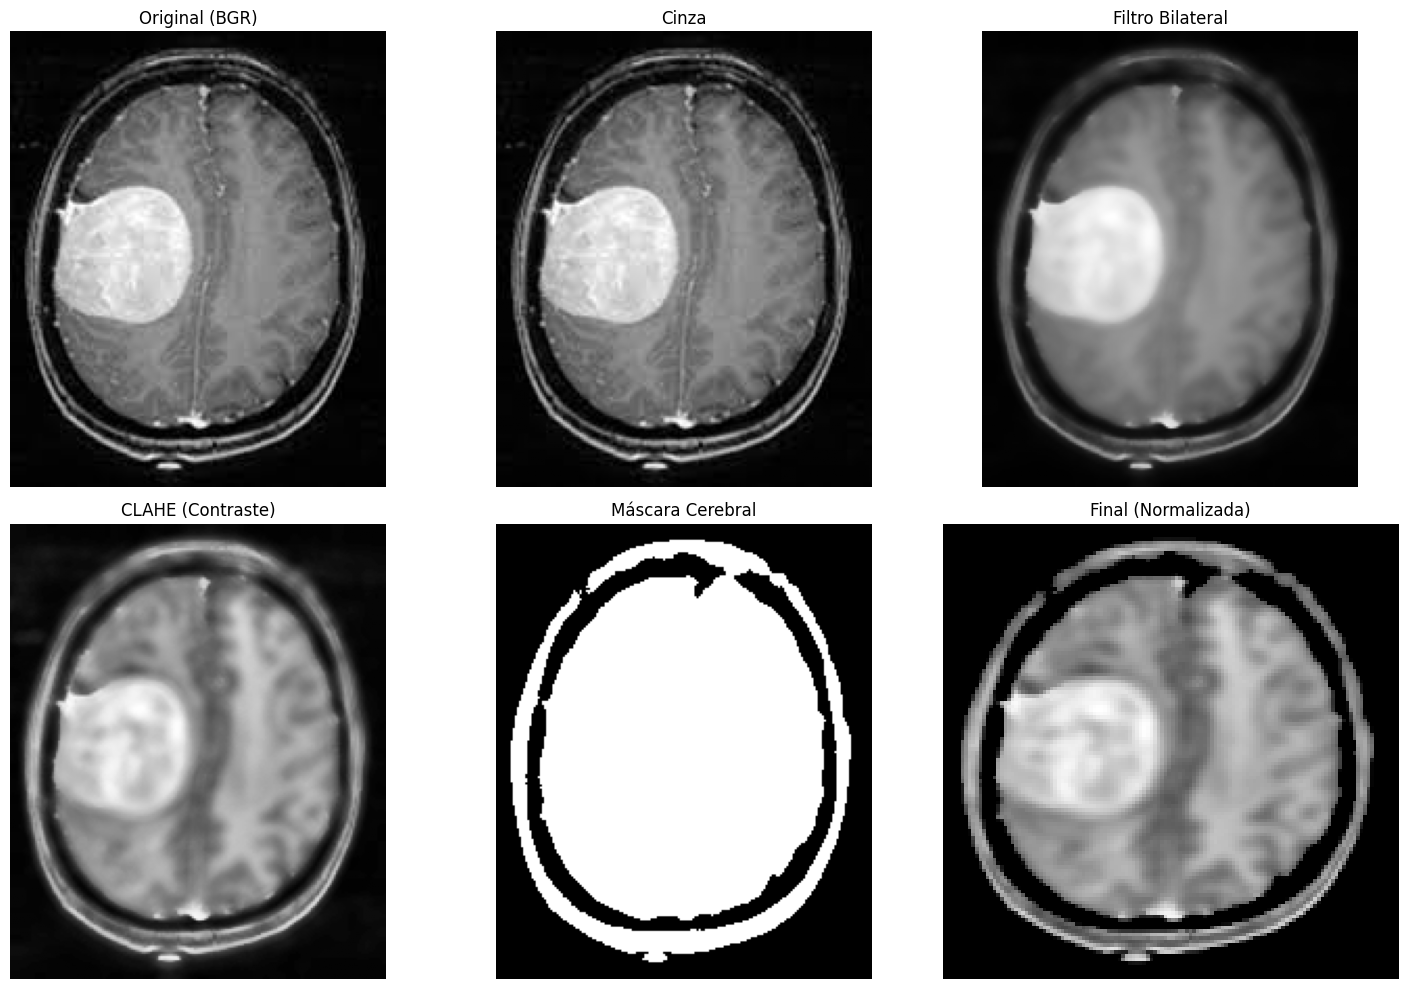

In [30]:
import os
extended_path = base_path + '/brain_tumor_dataset'
sample_path_yes = extended_path + "/yes/Y1.jpg"
sample_path_no = extended_path + '/no/1 no.jpeg'

#print(extended_path)
#print(sample_path_yes)
#print(sample_path_no)

#print("YES existe?", os.path.exists(sample_path_yes))
#print("NO existe?", os.path.exists(sample_path_no))

_ = preprocess_mri(sample_path_yes)


Visualizar filtros pra um caso negativo

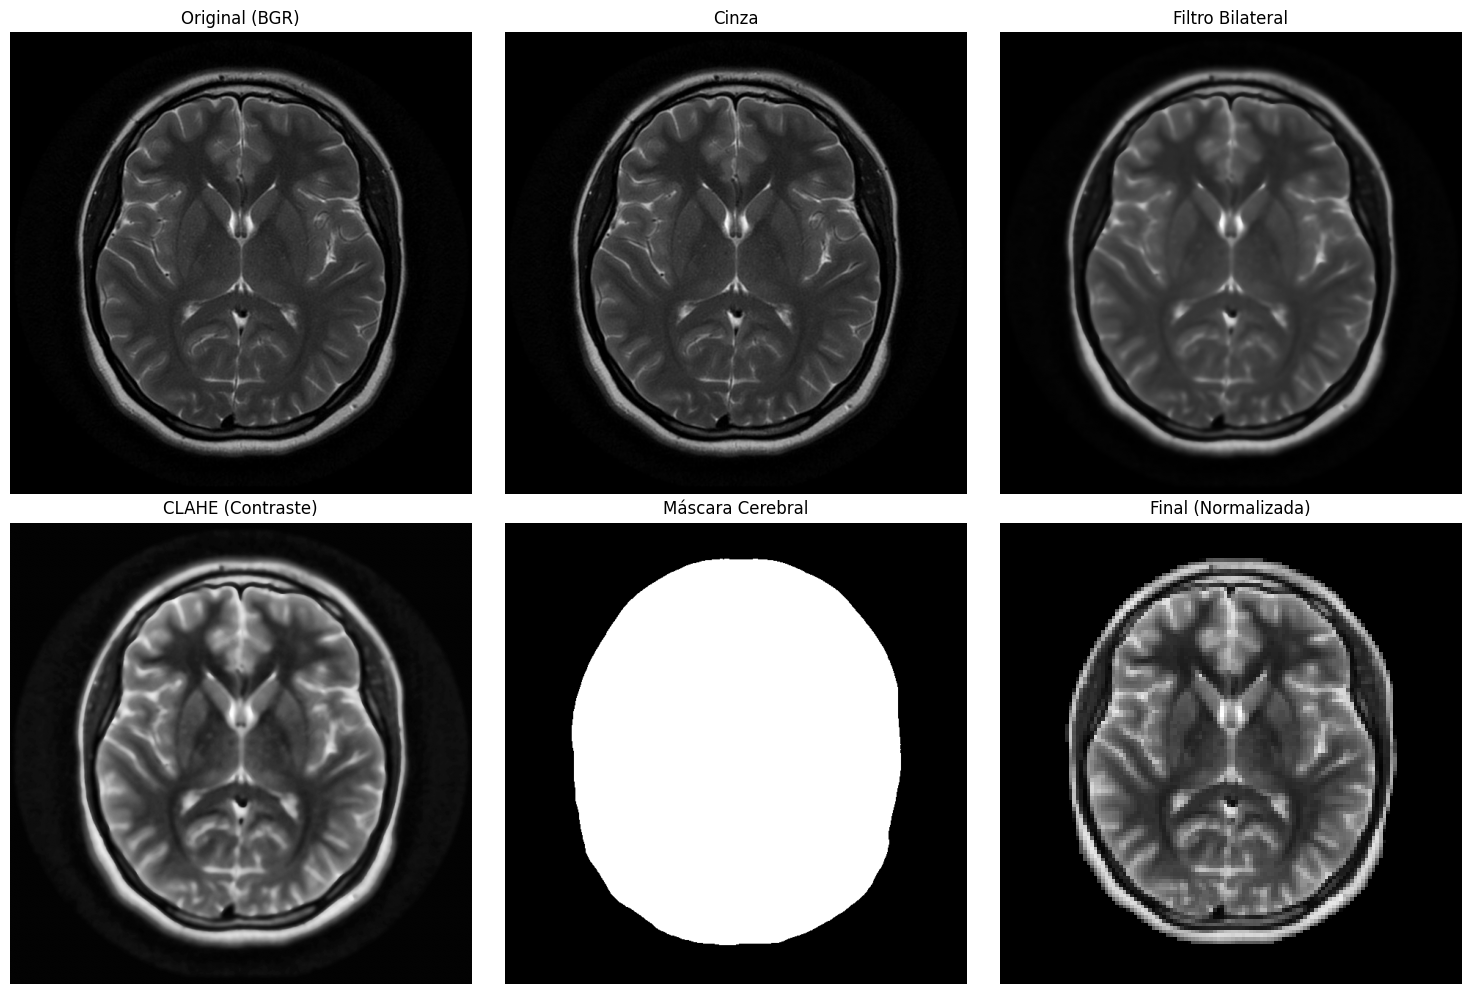

In [31]:
_ = preprocess_mri(sample_path_no)